# E-commerce Retail Penetration Analysis
This notebook will examine the penetration of E-commerce into total US retail sales.  
1. What is the current level and trend of penetration?
2. Are there categories that penetrated more than others?
3. Why might certain categories be penetrated more than others?

In [ ]:
# Created by Kamila Bajaria, Caitlyn Ta, Tashia Hughes, Charles Nguyen

In [1]:
# Initialize libraries, load data sources
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D 
import requests
import json

# Initialize variables
fileInputEcommerceSales='ecommerce_sales_2011_2015.csv'
fileInputTotalRetailSales='total_retail_sales.csv'
strWalMartKey='ecy75zcc2mwpjfqagm8959cw'

# Open input file, read into frame (source:  US Census Bureau)
# Ecommerce sales by NAICS Code
dfEcommerceSales = pd.read_csv(fileInputEcommerceSales)
# Total retails sales by NAICS Code
dfInputTotalRetailSales = pd.read_csv(fileInputTotalRetailSales)

In [2]:
dfEcommerceSales.head()

,NAICS_Code,Description,2015,2014,2013,2012,2011
0,441,Motor vehicle and parts dealers,528,497,428,393,310
1,442,Furniture and home furnishings stores,6712,5747,4745,3977,3326
2,443,Electronics and appliance stores,20444,19848,18016,17251,15061
3,444,Building material and garden equipment and sup...,6591,5283,4202,2961,2239
4,445,Food and beverage stores,1018,916,813,779,692


In [3]:
dfInputTotalRetailSales.head()

,NAICS_Code,Description,2015,2014,2013,2012,2011,2010,2009,2008,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,441,Motor vehicle and parts dealers,1095412,1020851,959294,886494,812938,742913,671772,785865,...,815579,796210,764204,688415,653817,627507,579715,541141,472916,418393
1,4411,Automobile dealers,941339,875566,819290,752778,684505,621180,551996,649505,...,707676,687782,661820,593501,564658,543949,501684,468100,407126,358444
2,44111,New car dealers,842120,785142,735374,672550,608788,549473,486565,575593,...,649413,630123,606167,542559,518972,502340,464642,435661,379522,333801
3,44112,Used car dealers,99219,90424,83916,80228,75717,71707,65431,73912,...,58263,57659,55653,50942,45686,41609,37042,32439,27604,24643
4,4412,Other motor vehicle dealers,64740,59531,54996,49581,45469,43794,45550,60042,...,46811,44989,39735,34915,30615,27994,26128,23801,20980,18026


In [4]:
# Join total retails sales to ecommerce sales on NAICS Code
dfJoinedSales=dfEcommerceSales.join(dfInputTotalRetailSales.set_index('NAICS_Code'),
                                    on='NAICS_Code', 
                                    how='left', 
                                    lsuffix='_ecom', 
                                    rsuffix='_total', 
                                    sort=False)
dfJoinedSales

,NAICS_Code,Description_ecom,2015_ecom,2014_ecom,2013_ecom,2012_ecom,2011_ecom,Description_total,2015_total,2014_total,...,2001,2000,1999,1998,1997,1996,1995,1994,1993,1992
0,441,Motor vehicle and parts dealers,528,497,428,393,310,Motor vehicle and parts dealers,1095412,1020851,...,815579,796210,764204,688415,653817,627507,579715,541141,472916,418393
1,442,Furniture and home furnishings stores,6712,5747,4745,3977,3326,Furniture and home furnishings stores,106779,99718,...,91484,91170,84294,77412,72715,67707,63470,60416,55456,52336
2,443,Electronics and appliance stores,20444,19848,18016,17251,15061,Electronics and appliance stores,102108,103518,...,80240,82206,78977,74527,70061,68363,64770,57266,48614,42631
3,444,Building material and garden equipment and sup...,6591,5283,4202,2961,2239,Building mat. and garden equip. and supplies d...,331644,318352,...,239379,228994,218290,202423,191063,176683,164561,157228,140964,130989
4,445,Food and beverage stores,1018,916,813,779,692,Food and beverage stores,685568,669165,...,462429,444764,433699,416525,409373,401073,390386,384340,374516,370513
5,446,Health and personal care stores,4589,4177,3854,3528,2786,Health and personal care stores,315257,299263,...,166533,155234,142699,129583,118672,109557,101635,96363,92594,89705
6,447,Gasoline stations,0,0,0,0,0,Gasoline stations,443817,538790,...,251383,249816,212524,191727,199700,194425,181113,171222,162376,156324
7,448,Clothing and clothing accessories stores,24234,21925,19765,16781,14406,Clothing and clothing access. Stores,255831,250409,...,167287,167674,159751,149151,140293,136581,131333,129083,124749,120103
8,451,Sporting goods hobby book and music stores,5387,5241,4943,5354,4849,Sporting goods hobby book and music stores,87355,85466,...,76836,75808,72458,68645,65288,63768,60642,57249,52091,49026
9,452,General merchandise stores,22526,20158,18058,15865,14025,General merchandise stores,674928,667163,...,427468,404228,380179,351081,331363,315305,300498,285190,265996,247876


In [5]:
# Roll up categories by year for total and ecommerce sales

esales2015=dfJoinedSales['2015_ecom'].sum()
tsales2015=dfJoinedSales['2015_total'].sum()
esales2014=dfJoinedSales['2014_ecom'].sum()
tsales2014=dfJoinedSales['2014_total'].sum()
esales2013=dfJoinedSales['2013_ecom'].sum()
tsales2013=dfJoinedSales['2013_total'].sum()
esales2012=dfJoinedSales['2012_ecom'].sum()
tsales2012=dfJoinedSales['2012_total'].sum()
esales2011=dfJoinedSales['2011_ecom'].sum()
tsales2011=dfJoinedSales['2011_total'].sum()

dfRollup = pd.DataFrame(data={'Type':{0: 'eCommerce'},
                             '2015':{0: esales2015},
                             '2014':{0: esales2014},
                             '2013':{0: esales2013},
                             '2012':{0: esales2012},
                             '2011':{0: esales2011}})

dfRollup = dfRollup[['Type', '2015', '2014', '2013', '2012', '2011']]
dfRollup.loc[1]=['Total Retail',tsales2015,tsales2014,tsales2013,tsales2012,tsales2011]

dfRollup

,Type,2015,2014,2013,2012,2011
0,eCommerce,294809,256269,221587,195477,168919
1,Total Retail,4727427,4639440,4458450,4302229,4102952


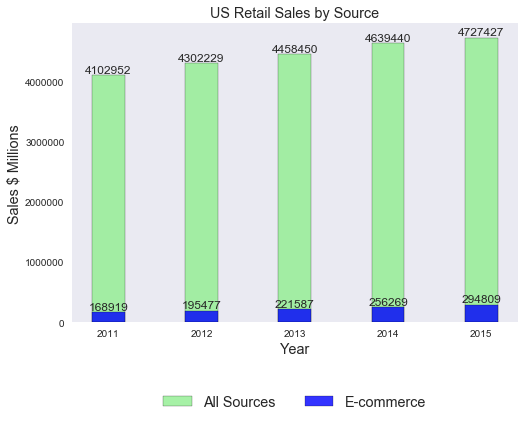

In [6]:
# create plot of ecommerce compared to total retail sales
n_groups=5
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8
SalesTotalRetail = (dfRollup['2011'][1], 
                    dfRollup['2012'][1], 
                    dfRollup['2013'][1],
                    dfRollup['2014'][1],
                    dfRollup['2015'][1])

SalesEcommerce = (dfRollup['2011'][0],
                  dfRollup['2012'][0],
                  dfRollup['2013'][0],
                  dfRollup['2014'][0],
                  dfRollup['2015'][0])
 
rects1 = plt.bar(index, SalesTotalRetail, bar_width,
                 alpha=opacity,
                 color='LightGreen',
                 label='All Sources',
                 edgecolor='black')
 
rects2 = plt.bar(index, SalesEcommerce, bar_width,
                 alpha=opacity,
                 color='Blue',
                 label='E-commerce',
                 edgecolor='black')

plt.xlabel('Year', fontsize="large")
plt.ylabel('Sales $ Millions', fontsize="large")
print("")
plt.title('US Retail Sales by Source', fontsize="large")
plt.xticks(index, ('2011', '2012', '2013', '2014', '2015'))
plt.legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize="large")



def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

#fig1=plt.gcf()
plt.grid(b=None, which='major')
plt.show()
plt.savefig("US Retail Sales by Source.png")
#fig1.savefig('agg_us_sales_by_source.png')

# Conclusions
1. E-commerce sales are small but growing percentage of total retail sales in the US
2. E-commerce sales are still only ~6% of total retail sales as of 2015

In [7]:
# Add computed colums for % of ecommerce sales by category - sort by most penetrated NAICS Code
# Which categories have the most ecommerce penetration?

dfJoinedSales['2015_pct_ecom']=dfJoinedSales['2015_ecom'] / dfJoinedSales['2015_total']
dfJoinedSales['2014_pct_ecom']=dfJoinedSales['2014_ecom'] / dfJoinedSales['2014_total']
dfJoinedSales['2013_pct_ecom']=dfJoinedSales['2013_ecom'] / dfJoinedSales['2013_total']
dfJoinedSales['2012_pct_ecom']=dfJoinedSales['2012_ecom'] / dfJoinedSales['2012_total']
dfJoinedSales['2011_pct_ecom']=dfJoinedSales['2011_ecom'] / dfJoinedSales['2011_total']
dfJoinedSales.sort_values('2015_pct_ecom', ascending=False)

,NAICS_Code,Description_ecom,2015_ecom,2014_ecom,2013_ecom,2012_ecom,2011_ecom,Description_total,2015_total,2014_total,...,1996,1995,1994,1993,1992,2015_pct_ecom,2014_pct_ecom,2013_pct_ecom,2012_pct_ecom,2011_pct_ecom
11,454,Nonstore retailers,192120,161653,138729,119562,102104,Nonstore retailers,509267,470867,...,117761,103516,96280,85811,78501,0.377248,0.343309,0.320297,0.292921,0.271305
2,443,Electronics and appliance stores,20444,19848,18016,17251,15061,Electronics and appliance stores,102108,103518,...,68363,64770,57266,48614,42631,0.200219,0.191735,0.174916,0.169028,0.150719
7,448,Clothing and clothing accessories stores,24234,21925,19765,16781,14406,Clothing and clothing access. Stores,255831,250409,...,136581,131333,129083,124749,120103,0.094727,0.087557,0.080765,0.070069,0.063017
10,453,Miscellaneous store retailers,10660,10824,8034,9026,9121,Miscellaneous store retailers,119461,115878,...,82819,75977,69457,61545,54840,0.089234,0.093409,0.071469,0.082041,0.084141
1,442,Furniture and home furnishings stores,6712,5747,4745,3977,3326,Furniture and home furnishings stores,106779,99718,...,67707,63470,60416,55456,52336,0.062859,0.057633,0.049765,0.043445,0.037974
8,451,Sporting goods hobby book and music stores,5387,5241,4943,5354,4849,Sporting goods hobby book and music stores,87355,85466,...,63768,60642,57249,52091,49026,0.061668,0.061323,0.058443,0.064521,0.060089
9,452,General merchandise stores,22526,20158,18058,15865,14025,General merchandise stores,674928,667163,...,315305,300498,285190,265996,247876,0.033375,0.030215,0.027702,0.024700,0.022448
3,444,Building material and garden equipment and sup...,6591,5283,4202,2961,2239,Building mat. and garden equip. and supplies d...,331644,318352,...,176683,164561,157228,140964,130989,0.019874,0.016595,0.013923,0.010517,0.008309
5,446,Health and personal care stores,4589,4177,3854,3528,2786,Health and personal care stores,315257,299263,...,109557,101635,96363,92594,89705,0.014556,0.013958,0.013674,0.012876,0.010257
4,445,Food and beverage stores,1018,916,813,779,692,Food and beverage stores,685568,669165,...,401073,390386,384340,374516,370513,0.001485,0.001369,0.001269,0.001240,0.001136


In [8]:
# Create ecommerce sales pct table
Headings=list(dfJoinedSales['Description_ecom'])
dfCategoryPct = pd.DataFrame(columns=Headings)
dfCategoryPct.loc['2011']=list(dfJoinedSales['2011_pct_ecom'])
dfCategoryPct.loc['2012']=list(dfJoinedSales['2012_pct_ecom'])
dfCategoryPct.loc['2013']=list(dfJoinedSales['2013_pct_ecom'])
dfCategoryPct.loc['2014']=list(dfJoinedSales['2014_pct_ecom'])
dfCategoryPct.loc['2015']=list(dfJoinedSales['2015_pct_ecom'])
dfCategoryPct

,Motor vehicle and parts dealers,Furniture and home furnishings stores,Electronics and appliance stores,Building material and garden equipment and supplies dealers,Food and beverage stores,Health and personal care stores,Gasoline stations,Clothing and clothing accessories stores,Sporting goods hobby book and music stores,General merchandise stores,Miscellaneous store retailers,Nonstore retailers
2011,0.000381,0.037974,0.150719,0.008309,0.001136,0.010257,0.0,0.063017,0.060089,0.022448,0.084141,0.271305
2012,0.000443,0.043445,0.169028,0.010517,0.001240,0.012876,0.0,0.070069,0.064521,0.024700,0.082041,0.292921
2013,0.000446,0.049765,0.174916,0.013923,0.001269,0.013674,0.0,0.080765,0.058443,0.027702,0.071469,0.320297
2014,0.000487,0.057633,0.191735,0.016595,0.001369,0.013958,0.0,0.087557,0.061323,0.030215,0.093409,0.343309
2015,0.000482,0.062859,0.200219,0.019874,0.001485,0.014556,0.0,0.094727,0.061668,0.033375,0.089234,0.377248


In [9]:
# Create a dataframe to support a rollup bar chart showing cumulative penetration of ecommerce
# by category over time

dfCategoryPct_new=dfCategoryPct
#Drop store types that do not map to categories
dfCategoryPct_new.drop('Nonstore retailers', axis = 1, inplace = True)
dfCategoryPct_new.head()

,Motor vehicle and parts dealers,Furniture and home furnishings stores,Electronics and appliance stores,Building material and garden equipment and supplies dealers,Food and beverage stores,Health and personal care stores,Gasoline stations,Clothing and clothing accessories stores,Sporting goods hobby book and music stores,General merchandise stores,Miscellaneous store retailers
2011,0.000381,0.037974,0.150719,0.008309,0.001136,0.010257,0.0,0.063017,0.060089,0.022448,0.084141
2012,0.000443,0.043445,0.169028,0.010517,0.001240,0.012876,0.0,0.070069,0.064521,0.024700,0.082041
2013,0.000446,0.049765,0.174916,0.013923,0.001269,0.013674,0.0,0.080765,0.058443,0.027702,0.071469
2014,0.000487,0.057633,0.191735,0.016595,0.001369,0.013958,0.0,0.087557,0.061323,0.030215,0.093409
2015,0.000482,0.062859,0.200219,0.019874,0.001485,0.014556,0.0,0.094727,0.061668,0.033375,0.089234


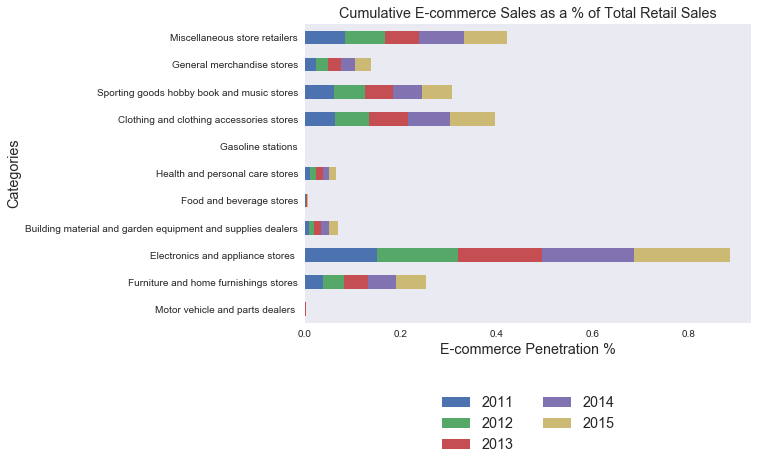

In [10]:
#Create cummulative rollup penetration chart over time
df1 = dfCategoryPct_new.transpose()
df1.plot.barh(stacked=True)
plt.legend(loc=9, bbox_to_anchor=(.5, -0.2), ncol=2, fontsize="large")
plt.xlabel('E-commerce Penetration %', fontsize="large")
plt.ylabel('Categories', fontsize="large")
print("")
plt.title('Cumulative E-commerce Sales as a % of Total Retail Sales', fontsize="large")
plt.grid()
plt.savefig("Cumulative E-commerce Sales as a % of Total Sales.png")
plt.show()

# Conclusions
E-commerce has penetrated certain retailer types more than others.  E-commerce is defined as a sale where the price and terms are negotiated completely via the Internet or mobile app.  Retailers who don't have a store front (non bricks-and-mortar) have the highest penetration of ~35% of sales via ecommerce.  The remainder is presumeably via phone or other non web method.

We would like to examine penetration of product categories.  Some store types don't map neatly to product categores (e.g., Miscellaneous, general merchandise, etc.)  For store types that are clearly mappable to product categories, the top categores for E-commerce penetration are:
1. Electronics & appliances
2. Clothing & accesories
3. Leisure items:  Sporting goods, hobby, music, & books
4. Furniture

The bottom categories for E-commerce penetration are:
1. Gasoline
2. Automotive parts
3. Food % beverage

Next we will examine a specific ecommerce retailer to determine if there is a correlation between E-commerce penetration and the number of items (assortment) availble from the store in the above categories

In [11]:
# Query walmart.com product api to obtain top level categories from product taxonomy

queryString="http://api.walmartlabs.com/v1/taxonomy?format=json&apiKey=ecy75zcc2mwpjfqagm8959cw"
ReturnedProductTaxonomy = requests.get(queryString)
jsonProductTaxonomy = ReturnedProductTaxonomy.json()
dfProductTaxonomy = pd.DataFrame(jsonProductTaxonomy['categories'])

# Map NAICS codes to product categories
dfProductTaxonomy['NAICS_Code']=0
dfProductTaxonomy.at[0,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][8]
dfProductTaxonomy.at[1,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][0]
dfProductTaxonomy.at[2,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][9]
dfProductTaxonomy.at[3,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][5]
dfProductTaxonomy.at[4,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][8]
dfProductTaxonomy.at[5,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][2]
dfProductTaxonomy.at[6,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][7]
dfProductTaxonomy.at[7,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][2]
dfProductTaxonomy.at[8,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][4]
dfProductTaxonomy.at[9,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][10]
dfProductTaxonomy.at[10,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][5]
dfProductTaxonomy.at[11,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][3]
dfProductTaxonomy.at[12,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][3]
dfProductTaxonomy.at[13,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][9]
dfProductTaxonomy.at[14,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][10]
dfProductTaxonomy.at[15,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][9]
dfProductTaxonomy.at[16,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][8]
dfProductTaxonomy.at[17,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][8]
dfProductTaxonomy.at[18,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][8]
dfProductTaxonomy.at[19,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][10]
dfProductTaxonomy.at[20,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][10]
dfProductTaxonomy.at[21,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][1]
dfProductTaxonomy.at[22,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][5]
dfProductTaxonomy.at[23,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][10]
dfProductTaxonomy.at[24,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][10]
dfProductTaxonomy.at[25,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][10]
dfProductTaxonomy.at[26,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][10]
dfProductTaxonomy.at[27,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][8]
dfProductTaxonomy.at[28,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][8]
dfProductTaxonomy.at[29,'NAICS_Code'] = dfJoinedSales['NAICS_Code'][8]
dfProductTaxonomy

,children,id,name,path,NAICS_Code
0,"[{'id': '1334134_5899871', 'name': 'Art & Draw...",1334134,"Arts, Crafts & Sewing","Arts, Crafts & Sewing",451
1,"[{'id': '91083_1074767', 'name': 'Auto Body', ...",91083,Auto & Tires,Auto & Tires,441
2,"[{'id': '5427_491351', 'name': 'Baby & Toddler...",5427,Baby,Baby,452
3,"[{'id': '1085666_1071969', 'name': 'Bath & Bod...",1085666,Beauty,Beauty,446
4,"[{'id': '3920_8844202', 'name': 'Adult Colorin...",3920,Books,Books,451
5,"[{'id': '1105910_133161', 'name': 'Accessories...",1105910,Cell Phones,Cell Phones,443
6,"[{'id': '5438_426265', 'name': 'Accessories', ...",5438,Clothing,Clothing,448
7,"[{'id': '3944_1228636', 'name': '3D Printing',...",3944,Electronics,Electronics,443
8,"[{'id': '976759_976779', 'name': 'Bakery & Bre...",976759,Food,Food,445
9,"[{'id': '1094765_133059', 'name': 'Gift Basket...",1094765,Gifts & Registry,Gifts & Registry,453


In [12]:
# Add column for product assortment count and retrieve from walmart.com api
# http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=1085632&apiKey=ecy75zcc2mwpjfqagm8959cw

dfProductTaxonomy['Item_Count']=0

queryStringPrefix='http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId='
queryKeyString='&apiKey='+strWalMartKey

# Some categories overflow the server and result in a '500' error so leave those out for now
badlist=['3920','3944']

for index in range(0, 30):
    queryCategory=dfProductTaxonomy['id'][index]
    if queryCategory not in badlist:
        queryString=queryStringPrefix+queryCategory+queryKeyString
        print(index,queryString)
        ReturnedCategorySearch = requests.get(queryString)
        jsonReturnedCategorySearch = ReturnedCategorySearch.json()
        totalItems=jsonReturnedCategorySearch['totalResults']
        dfProductTaxonomy.at[index,'Item_Count']=totalItems
    
#queryString=queryStringPrefix+queryCategory+queryKeyString
#ReturnedCategorySearch = requests.get(queryString)
#jsonReturnedCategorySearch = ReturnedCategorySearch.json()
#totalProducts=jsonReturnedCategorySearch['totalResults']
dfProductTaxonomy

0 http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=1334134&apiKey=ecy75zcc2mwpjfqagm8959cw
1 http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=91083&apiKey=ecy75zcc2mwpjfqagm8959cw
2 http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=5427&apiKey=ecy75zcc2mwpjfqagm8959cw
3 http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=1085666&apiKey=ecy75zcc2mwpjfqagm8959cw
5 http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=1105910&apiKey=ecy75zcc2mwpjfqagm8959cw
6 http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=5438&apiKey=ecy75zcc2mwpjfqagm8959cw
8 http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=976759&apiKey=ecy75zcc2mwpjfqagm8959cw
9 http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=1094765&apiKey=ecy75zcc2mwpjfqagm8959cw
10 http://api.walmartlabs.com/v1/search?query=%2A&format=json&categoryId=976760&apiKey=ecy75zcc2mwpjfqagm8959cw
1

,children,id,name,path,NAICS_Code,Item_Count
0,"[{'id': '1334134_5899871', 'name': 'Art & Draw...",1334134,"Arts, Crafts & Sewing","Arts, Crafts & Sewing",451,779821
1,"[{'id': '91083_1074767', 'name': 'Auto Body', ...",91083,Auto & Tires,Auto & Tires,441,2537043
2,"[{'id': '5427_491351', 'name': 'Baby & Toddler...",5427,Baby,Baby,452,126296
3,"[{'id': '1085666_1071969', 'name': 'Bath & Bod...",1085666,Beauty,Beauty,446,297367
4,"[{'id': '3920_8844202', 'name': 'Adult Colorin...",3920,Books,Books,451,0
5,"[{'id': '1105910_133161', 'name': 'Accessories...",1105910,Cell Phones,Cell Phones,443,976067
6,"[{'id': '5438_426265', 'name': 'Accessories', ...",5438,Clothing,Clothing,448,2230016
7,"[{'id': '3944_1228636', 'name': '3D Printing',...",3944,Electronics,Electronics,443,0
8,"[{'id': '976759_976779', 'name': 'Bakery & Bre...",976759,Food,Food,445,133350
9,"[{'id': '1094765_133059', 'name': 'Gift Basket...",1094765,Gifts & Registry,Gifts & Registry,453,25748


In [13]:
ReturnedCategorySearch

<Response [200]>

# API Reaches Daily Call Limit 
The above fails because it exceeds the daily API call limit.  If the limit is taken into account,
the needed data will take two weeks to show up.  DO NOT RUN AGAIN!!!
Since the above API failed at 10 million items, we know there are at least 10 million items for both Electronics
and books, so lets use this count as a substitute

In [14]:
# Books query failed at 10 million, so there are at least 10 million books availble
dfProductTaxonomy.at[4,'Item_Count']=10000000

# Since walmart failes for electronics, query electronics assortment from bestbuy.com
queryString='https://api.bestbuy.com/v1/products(name=*)?format=json&show=sku,name,salePrice&pageSize=100&cursorMark=*&apiKey=7lPiwOmId0RLueHbCiRrWroD'

ReturnedProductSearch = requests.get(queryString)
jsonReturnedProductSearch = ReturnedProductSearch.json()
totalItems=jsonReturnedProductSearch['total']
dfProductTaxonomy.at[7,'Item_Count']=totalItems
dfProductTaxonomy

,children,id,name,path,NAICS_Code,Item_Count
0,"[{'id': '1334134_5899871', 'name': 'Art & Draw...",1334134,"Arts, Crafts & Sewing","Arts, Crafts & Sewing",451,779821
1,"[{'id': '91083_1074767', 'name': 'Auto Body', ...",91083,Auto & Tires,Auto & Tires,441,2537043
2,"[{'id': '5427_491351', 'name': 'Baby & Toddler...",5427,Baby,Baby,452,126296
3,"[{'id': '1085666_1071969', 'name': 'Bath & Bod...",1085666,Beauty,Beauty,446,297367
4,"[{'id': '3920_8844202', 'name': 'Adult Colorin...",3920,Books,Books,451,10000000
5,"[{'id': '1105910_133161', 'name': 'Accessories...",1105910,Cell Phones,Cell Phones,443,976067
6,"[{'id': '5438_426265', 'name': 'Accessories', ...",5438,Clothing,Clothing,448,2230016
7,"[{'id': '3944_1228636', 'name': '3D Printing',...",3944,Electronics,Electronics,443,681193
8,"[{'id': '976759_976779', 'name': 'Bakery & Bre...",976759,Food,Food,445,133350
9,"[{'id': '1094765_133059', 'name': 'Gift Basket...",1094765,Gifts & Registry,Gifts & Registry,453,25748


In [15]:
# Create dataframe for scatter plot with eCommerce Penetration and item counts from walmart categories
Headings=list(['NAICS_Code','NAICS Category','Total Retail Sales','2015 eCommerce Penetration','Item Count'])
dfScatter = pd.DataFrame(columns=Headings)

for row in range(0,12):
    NAICS_Filter=dfJoinedSales.loc[row,'NAICS_Code']
    dfTaxonomyFiltered=dfProductTaxonomy[dfProductTaxonomy['NAICS_Code']==NAICS_Filter]
    ItemCount=dfTaxonomyFiltered['Item_Count'].sum()
    dfScatter.at[row,'NAICS_Code']=dfJoinedSales.loc[row,'NAICS_Code']
    dfScatter.at[row,'NAICS_Category']=dfJoinedSales.loc[row,'Description_total']
    dfScatter.at[row,'Total Retail Sales']=dfJoinedSales.loc[row,'2015_total']
    dfScatter.at[row,'2015 eCommerce Penetration']=dfJoinedSales.loc[row,'2015_pct_ecom']
    dfScatter.at[row,'Item Count']=ItemCount

# Drop nonstore
dfScatter=dfScatter.drop(dfScatter.index[11])
dfScatter['Size']=dfScatter['Total Retail Sales'].astype(float)/1000
dfScatter

,NAICS_Code,NAICS Category,Total Retail Sales,2015 eCommerce Penetration,Item Count,NAICS_Category,Size
0,441,NaN,1095412,0.00048201,2537043,Motor vehicle and parts dealers,1095.412
1,442,NaN,106779,0.0628588,497436,Furniture and home furnishings stores,106.779
2,443,NaN,102108,0.200219,1657260,Electronics and appliance stores,102.108
3,444,NaN,331644,0.0198737,8629865,Building mat. and garden equip. and supplies d...,331.644
4,445,NaN,685568,0.0014849,133350,Food and beverage stores,685.568
5,446,NaN,315257,0.0145564,709221,Health and personal care stores,315.257
6,447,NaN,443817,0,0,Gasoline stations,443.817
7,448,NaN,255831,0.0947266,2230016,Clothing and clothing access. Stores,255.831
8,451,NaN,87355,0.0616679,13411916,Sporting goods hobby book and music stores,87.355
9,452,NaN,674928,0.0333754,3927574,General merchandise stores,674.928


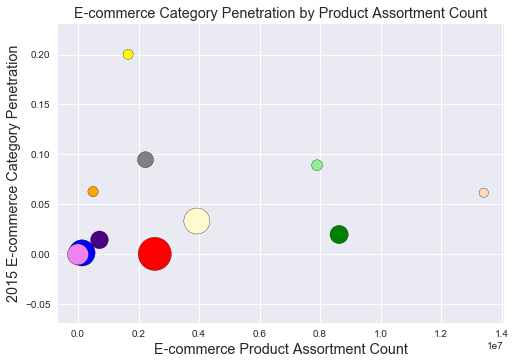

In [16]:
# Scatter Plot
plt.xlabel('E-commerce Product Assortment Count', fontsize = 'large')
plt.ylabel('2015 E-commerce Category Penetration', fontsize = 'large')
plt.title('E-commerce Category Penetration by Product Assortment Count', fontsize="large")
colors=['red','orange','yellow','green','blue','indigo','violet','gray','peachpuff','lemonchiffon','lightgreen']
plt.scatter(dfScatter['Item Count'], dfScatter['2015 eCommerce Penetration'], label=dfScatter['NAICS_Category'], color=colors, s=dfScatter['Size'], edgecolor='black')
print("")
plt.savefig("E-commerce Category Penetration by Product Assortment Count.png")
plt.show()

In [17]:
dfScatter_new = dfScatter
dfScatter_new

,NAICS_Code,NAICS Category,Total Retail Sales,2015 eCommerce Penetration,Item Count,NAICS_Category,Size
0,441,NaN,1095412,0.00048201,2537043,Motor vehicle and parts dealers,1095.412
1,442,NaN,106779,0.0628588,497436,Furniture and home furnishings stores,106.779
2,443,NaN,102108,0.200219,1657260,Electronics and appliance stores,102.108
3,444,NaN,331644,0.0198737,8629865,Building mat. and garden equip. and supplies d...,331.644
4,445,NaN,685568,0.0014849,133350,Food and beverage stores,685.568
5,446,NaN,315257,0.0145564,709221,Health and personal care stores,315.257
6,447,NaN,443817,0,0,Gasoline stations,443.817
7,448,NaN,255831,0.0947266,2230016,Clothing and clothing access. Stores,255.831
8,451,NaN,87355,0.0616679,13411916,Sporting goods hobby book and music stores,87.355
9,452,NaN,674928,0.0333754,3927574,General merchandise stores,674.928


In [18]:
# Create a dataframe to support bubble chart 
#Drop store types that do not map to categories
dfScatter_new.drop(['NAICS_Code','NAICS Category'], axis = 1, inplace = True)
dfScatter_new.head()

,Total Retail Sales,2015 eCommerce Penetration,Item Count,NAICS_Category,Size
0,1095412,0.00048201,2537043,Motor vehicle and parts dealers,1095.412
1,106779,0.0628588,497436,Furniture and home furnishings stores,106.779
2,102108,0.200219,1657260,Electronics and appliance stores,102.108
3,331644,0.0198737,8629865,Building mat. and garden equip. and supplies d...,331.644
4,685568,0.0014849,133350,Food and beverage stores,685.568


In [19]:
dfScatter_graph = dfScatter_new
dfScatter_graph

,Total Retail Sales,2015 eCommerce Penetration,Item Count,NAICS_Category,Size
0,1095412,0.00048201,2537043,Motor vehicle and parts dealers,1095.412
1,106779,0.0628588,497436,Furniture and home furnishings stores,106.779
2,102108,0.200219,1657260,Electronics and appliance stores,102.108
3,331644,0.0198737,8629865,Building mat. and garden equip. and supplies d...,331.644
4,685568,0.0014849,133350,Food and beverage stores,685.568
5,315257,0.0145564,709221,Health and personal care stores,315.257
6,443817,0,0,Gasoline stations,443.817
7,255831,0.0947266,2230016,Clothing and clothing access. Stores,255.831
8,87355,0.0616679,13411916,Sporting goods hobby book and music stores,87.355
9,674928,0.0333754,3927574,General merchandise stores,674.928


In [20]:
# Pending Review
#separate by each NAICS_Category and create separate scatter plot graphs on one graph
motorvehicle_graph = dfScatter_graph[dfScatter_graph["NAICS_Category"]=="Motor vehicle and parts dealers"]
furniture_graph = dfScatter_graph[dfScatter_graph["NAICS_Category"]=="Furniture and home furnishings stores"]
electronics_graph = dfScatter_graph[dfScatter_graph["NAICS_Category"]=="Electronics and appliance stores"]
building_graph = dfScatter_graph[dfScatter_graph["NAICS_Category"]=="Building mat. and garden equip. and supplies d..."]
foodbev_graph = dfScatter_graph[dfScatter_graph["NAICS_Category"]=="Food and beverage stores"]
healthpersonal_graph = dfScatter_graph[dfScatter_graph["NAICS_Category"]=="Health and personal care stores"]
gasstation_graph = dfScatter_graph[dfScatter_graph["NAICS_Category"]=="Gasoline stations"]
clothing_graph = dfScatter_graph[dfScatter_graph["NAICS_Category"]=="Clothing and clothing access. Stores"]
sportinggoods_graph = dfScatter_graph[dfScatter_graph["NAICS_Category"]=="Sporting goods hobby book and music stores"]

In [21]:
dfScatter_JoinedSales = dfJoinedSales
dfScatter_JoinedSales

,NAICS_Code,Description_ecom,2015_ecom,2014_ecom,2013_ecom,2012_ecom,2011_ecom,Description_total,2015_total,2014_total,...,1996,1995,1994,1993,1992,2015_pct_ecom,2014_pct_ecom,2013_pct_ecom,2012_pct_ecom,2011_pct_ecom
0,441,Motor vehicle and parts dealers,528,497,428,393,310,Motor vehicle and parts dealers,1095412,1020851,...,627507,579715,541141,472916,418393,0.000482,0.000487,0.000446,0.000443,0.000381
1,442,Furniture and home furnishings stores,6712,5747,4745,3977,3326,Furniture and home furnishings stores,106779,99718,...,67707,63470,60416,55456,52336,0.062859,0.057633,0.049765,0.043445,0.037974
2,443,Electronics and appliance stores,20444,19848,18016,17251,15061,Electronics and appliance stores,102108,103518,...,68363,64770,57266,48614,42631,0.200219,0.191735,0.174916,0.169028,0.150719
3,444,Building material and garden equipment and sup...,6591,5283,4202,2961,2239,Building mat. and garden equip. and supplies d...,331644,318352,...,176683,164561,157228,140964,130989,0.019874,0.016595,0.013923,0.010517,0.008309
4,445,Food and beverage stores,1018,916,813,779,692,Food and beverage stores,685568,669165,...,401073,390386,384340,374516,370513,0.001485,0.001369,0.001269,0.001240,0.001136
5,446,Health and personal care stores,4589,4177,3854,3528,2786,Health and personal care stores,315257,299263,...,109557,101635,96363,92594,89705,0.014556,0.013958,0.013674,0.012876,0.010257
6,447,Gasoline stations,0,0,0,0,0,Gasoline stations,443817,538790,...,194425,181113,171222,162376,156324,0.000000,0.000000,0.000000,0.000000,0.000000
7,448,Clothing and clothing accessories stores,24234,21925,19765,16781,14406,Clothing and clothing access. Stores,255831,250409,...,136581,131333,129083,124749,120103,0.094727,0.087557,0.080765,0.070069,0.063017
8,451,Sporting goods hobby book and music stores,5387,5241,4943,5354,4849,Sporting goods hobby book and music stores,87355,85466,...,63768,60642,57249,52091,49026,0.061668,0.061323,0.058443,0.064521,0.060089
9,452,General merchandise stores,22526,20158,18058,15865,14025,General merchandise stores,674928,667163,...,315305,300498,285190,265996,247876,0.033375,0.030215,0.027702,0.024700,0.022448


In [22]:
# Retail vs E-Com data
subset_dfScatter_ecomRetSales = dfScatter_JoinedSales[['Description_ecom','2015_ecom','2014_ecom', '2013_ecom',
                                                      '2012_ecom', '2011_ecom', 'Description_total','2015_total','2014_total', '2013_total',
                                                      '2012_total', '2011_total']]
subset_dfScatter_ecomRetSales

,Description_ecom,2015_ecom,2014_ecom,2013_ecom,2012_ecom,2011_ecom,Description_total,2015_total,2014_total,2013_total,2012_total,2011_total
0,Motor vehicle and parts dealers,528,497,428,393,310,Motor vehicle and parts dealers,1095412,1020851,959294,886494,812938
1,Furniture and home furnishings stores,6712,5747,4745,3977,3326,Furniture and home furnishings stores,106779,99718,95349,91542,87586
2,Electronics and appliance stores,20444,19848,18016,17251,15061,Electronics and appliance stores,102108,103518,102998,102060,99928
3,Building material and garden equipment and sup...,6591,5283,4202,2961,2239,Building mat. and garden equip. and supplies d...,331644,318352,301797,281533,269480
4,Food and beverage stores,1018,916,813,779,692,Food and beverage stores,685568,669165,640847,628205,609137
5,Health and personal care stores,4589,4177,3854,3528,2786,Health and personal care stores,315257,299263,281840,274000,271612
6,Gasoline stations,0,0,0,0,0,Gasoline stations,443817,538790,549613,555419,533457
7,Clothing and clothing accessories stores,24234,21925,19765,16781,14406,Clothing and clothing access. Stores,255831,250409,244722,239493,228606
8,Sporting goods hobby book and music stores,5387,5241,4943,5354,4849,Sporting goods hobby book and music stores,87355,85466,84578,82981,80697
9,General merchandise stores,22526,20158,18058,15865,14025,General merchandise stores,674928,667163,651874,642313,624766


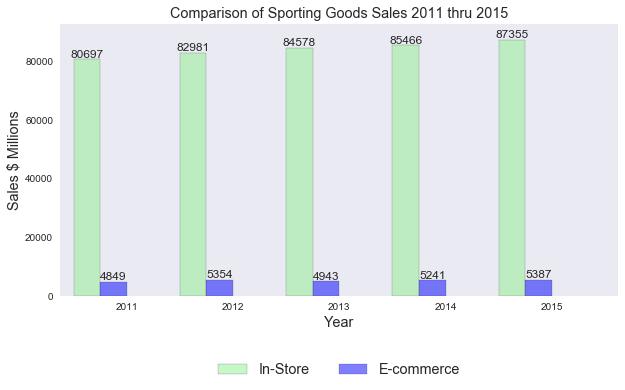

In [23]:
#Sporting Goods graph comparing sales of in-store vs. e-commerce 2011 thru 2015
sporting_data = {'Year': ['2011','2012','2013','2014','2015'],
        'In-Store_Sales': [80697, 82981, 84578, 85466, 87355],
        'Ecommerce_Sales': [4849, 5354, 4943, 5241, 5387]}

#Convert sporting good data to dataframe
sporting_graph = pd.DataFrame(sporting_data, columns = ['Year', 'In-Store_Sales','Ecommerce_Sales'])

# Setting the positions and width for the bars
pos = list(range(len(sporting_graph['In-Store_Sales']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with 2011-2015 in-store sales data
rects1_1 = plt.bar(pos, sporting_graph['In-Store_Sales'], width, alpha=0.5, color='lightgreen', edgecolor='black', label=sporting_graph['Year']) 

# Create bars with 2011-2015 ecommerce sales data
# in position pos + some width buffer
rects2_1 = plt.bar([p + width for p in pos], sporting_graph['Ecommerce_Sales'], width, alpha=0.5, color='blue', edgecolor='black', label=sporting_graph['Year'])

# Set the y axis label
ax.set_ylabel('Sales $ Millions', fontsize="large")

#Set the x axis label
plt.xlabel('Year', fontsize="large")

# Set the chart's title
ax.set_title('Comparison of Sporting Goods Sales 2011 thru 2015', fontsize="large")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(sporting_graph['Year'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(sporting_graph['In-Store_Sales'] + sporting_graph['Ecommerce_Sales'])] )

# Set labels for values
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1_1)
autolabel(rects2_1)



# Adding the legend and showing the plot
plt.legend(['In-Store','E-commerce'], loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize="large")
plt.grid()
plt.savefig("Comparison of Sporting Goods Sales 2011 thru 2015.png")
plt.show()

In [24]:
# Sporting Goods Sales observations
# In-Store sales generally increase thru 2011-2015, E-commerce sales has been staying steady bewteen 4800 to 5400 thru 2011-2015, no increasing trend.

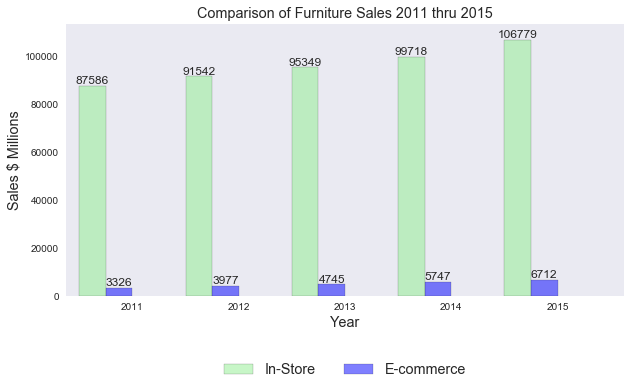

In [25]:
#Furniture graph comparing sales of in-store vs. e-commerce 2011 thru 2015
furniture_data = {'Year': ['2011','2012','2013','2014','2015'],
        'In-Store_Sales': [87586, 91542, 95349, 99718, 106779],
        'Ecommerce_Sales': [3326, 3977, 4745, 5747, 6712]}

#Convert furniture data to dataframe
furniture_graph = pd.DataFrame(furniture_data, columns = ['Year', 'In-Store_Sales','Ecommerce_Sales'])

# Setting the positions and width for the bars
pos = list(range(len(furniture_graph['In-Store_Sales']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with 2011-2015 in-store sales data
rects1_2 = plt.bar(pos, furniture_graph['In-Store_Sales'], width, alpha=0.5, color='lightgreen', edgecolor='black', label=furniture_graph['Year']) 

# Create bars with 2011-2015 ecommerce sales data
# in position pos + some width buffer
rects2_2 = plt.bar([p + width for p in pos], furniture_graph['Ecommerce_Sales'], width, alpha=0.5, color='blue', edgecolor='black', label=furniture_graph['Year'])

# Set the y axis label
ax.set_ylabel('Sales $ Millions', fontsize="large")

#Set the x axis label
plt.xlabel('Year', fontsize="large")

# Set the chart's title
ax.set_title('Comparison of Furniture Sales 2011 thru 2015', fontsize="large")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(furniture_graph['Year'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(furniture_graph['In-Store_Sales'] + furniture_graph['Ecommerce_Sales'])] )

# Set labels for values
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1_2)
autolabel(rects2_2)

# Adding the legend and showing the plot
plt.legend(['In-Store','E-commerce'], loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize="large")
plt.grid()
plt.savefig("Comparison of Furniture Sales 2011 thru 2015.png")
plt.show()

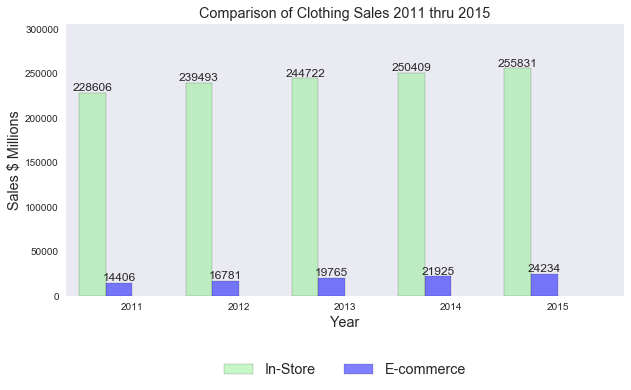

In [26]:
#Clothing graph comparing sales of in-store vs. e-commerce 2011 thru 2015
clothing_data = {'Year': ['2011','2012','2013','2014','2015'],
        'In-Store_Sales': [228606, 239493, 244722, 250409, 255831],
        'Ecommerce_Sales': [14406, 16781, 19765, 21925, 24234]}

#Convert clothing data to dataframe
clothing_graph = pd.DataFrame(clothing_data, columns = ['Year', 'In-Store_Sales','Ecommerce_Sales'])

# Setting the positions and width for the bars
pos = list(range(len(clothing_graph['In-Store_Sales']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create bars with 2011-2015 in-store sales data
rects1_3 = plt.bar(pos, clothing_graph['In-Store_Sales'], width, alpha=0.5, color='lightgreen', edgecolor='black', label=clothing_graph['Year']) 

# Create bars with 2011-2015 ecommerce sales data
# in position pos + some width buffer
rects2_3 = plt.bar([p + width for p in pos], clothing_graph['Ecommerce_Sales'], width, alpha=0.5, color='blue', edgecolor='black', label=clothing_graph['Year'])

# Set the y axis label
ax.set_ylabel('Sales $ Millions', fontsize="large")

#Set the x axis label
plt.xlabel('Year', fontsize="large")

# Set the chart's title
ax.set_title('Comparison of Clothing Sales 2011 thru 2015', fontsize="large")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(clothing_graph['Year'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(clothing_graph['In-Store_Sales']) + 50000])

# Set labels for values
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1_3)
autolabel(rects2_3)


# Adding the legend and showing the plot
plt.legend(['In-Store','E-commerce'], loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize="large")
plt.grid()
plt.savefig("Comparison of Clothing Sales 2011 thru 2015.png")
plt.show()

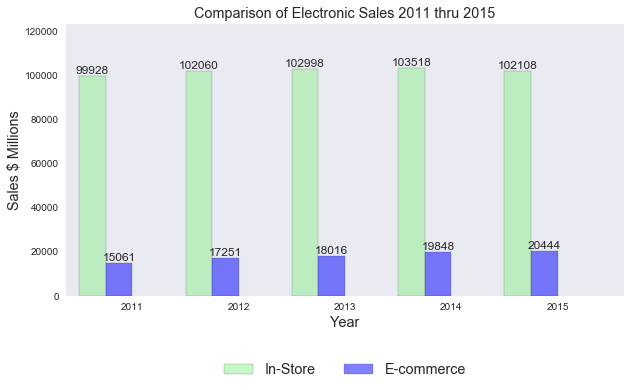

In [27]:
#Electronics graph comparing sales of in-store vs. E-commerce 2011 thru 2015
electronics_data = {'Year': ['2011','2012','2013','2014','2015'],
        'In-Store_Sales': [99928, 102060, 102998, 103518, 102108],
        'Ecommerce_Sales': [15061, 17251, 18016, 19848, 20444]}

#Convert electronics data to dataframe
electronics_graph = pd.DataFrame(electronics_data, columns = ['Year', 'In-Store_Sales','Ecommerce_Sales'])

# Setting the positions and width for the bars
pos = list(range(len(electronics_graph['In-Store_Sales']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with 2011 retail data
# in position pos
rects1_4 = plt.bar(pos, electronics_graph['In-Store_Sales'], width, alpha=0.5, color='lightgreen', edgecolor = 'black', label=electronics_graph['Year']) 

# Create a bar with 2011 E-commerce data
# in position pos + some width buffer
rects2_4 = plt.bar([p + width for p in pos], electronics_graph['Ecommerce_Sales'], width, alpha=0.5, color='blue', edgecolor = 'black', label=electronics_graph['Year'])

# Set the y axis label
ax.set_ylabel('Sales $ Millions', fontsize="large")

#Set the x axis label
plt.xlabel('Year', fontsize="large")

# Set the chart's title
ax.set_title('Comparison of Electronic Sales 2011 thru 2015', fontsize="large")

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(electronics_graph['Year'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(electronics_graph['In-Store_Sales'] + electronics_graph['Ecommerce_Sales'])] )

# Set labels for values
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1_4)
autolabel(rects2_4)

# Adding the legend and showing the plot
plt.legend(['In-Store','E-commerce'], loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2, fontsize="large")
plt.grid()
plt.savefig("Comparison of Electronic Sales 2011 thru 2015.png")
plt.show()

In [28]:
# Trend obersation for electronic sales In-Store vs E-commerce
# In-store sales was gradually increasing until year 2014 when sales started to decrease year 2015 while E-commerce has been gradually increasing every year.

In [29]:
# ONLY Retail
subset_dfScatter_RetailSales = dfScatter_JoinedSales[['Description_total','2015_total','2014_total', '2013_total',
                                                      '2012_total', '2011_total']]
subset_dfScatter_RetailSales

,Description_total,2015_total,2014_total,2013_total,2012_total,2011_total
0,Motor vehicle and parts dealers,1095412,1020851,959294,886494,812938
1,Furniture and home furnishings stores,106779,99718,95349,91542,87586
2,Electronics and appliance stores,102108,103518,102998,102060,99928
3,Building mat. and garden equip. and supplies d...,331644,318352,301797,281533,269480
4,Food and beverage stores,685568,669165,640847,628205,609137
5,Health and personal care stores,315257,299263,281840,274000,271612
6,Gasoline stations,443817,538790,549613,555419,533457
7,Clothing and clothing access. Stores,255831,250409,244722,239493,228606
8,Sporting goods hobby book and music stores,87355,85466,84578,82981,80697
9,General merchandise stores,674928,667163,651874,642313,624766


In [30]:
# ONLY E-Commerce
subset_dfScatter_eCommerceSales = dfScatter_JoinedSales[['Description_ecom','2015_ecom','2014_ecom', '2013_ecom',
                                                      '2012_ecom', '2011_ecom']]
subset_dfScatter_eCommerceSales

,Description_ecom,2015_ecom,2014_ecom,2013_ecom,2012_ecom,2011_ecom
0,Motor vehicle and parts dealers,528,497,428,393,310
1,Furniture and home furnishings stores,6712,5747,4745,3977,3326
2,Electronics and appliance stores,20444,19848,18016,17251,15061
3,Building material and garden equipment and sup...,6591,5283,4202,2961,2239
4,Food and beverage stores,1018,916,813,779,692
5,Health and personal care stores,4589,4177,3854,3528,2786
6,Gasoline stations,0,0,0,0,0
7,Clothing and clothing accessories stores,24234,21925,19765,16781,14406
8,Sporting goods hobby book and music stores,5387,5241,4943,5354,4849
9,General merchandise stores,22526,20158,18058,15865,14025


# Conclusions
1. Product selection (number of items offered) in a category on E-commerce sites is correlated with penetration of that category.  Consumers like selection and E-commerce is delivering that to them and taking sales away from bricks and motar stores which lack selection.
2. E-commerce is underpentrating some signficantly large categories such as autos/autoparts, petroleum products, and food & beverage - these categories represent opportunities for E-commerce

In [ ]:
# Failed API Call for Walmart Data
##For overflow categories, use paginated API to count items
ItemCountAccumulator=0
Continue=True

queryStringPrefix='http://api.walmartlabs.com/v1/paginated/items?format=json&category='
queryDomain='http://api.walmartlabs.com'
queryCategoryID='3920'
queryKeyString='&apiKey='+strWalMartKey
queryString=queryStringPrefix+queryCategoryID+queryKeyString
ReturnedCategorySearch = requests.get(queryString)
jsonReturnedCategorySearch = ReturnedCategorySearch.json()
#print(jsonReturnedCategorySearch.keys())
CurrentItemCount=len(jsonReturnedCategorySearch['items'])
ItemCountAccumulator=ItemCountAccumulator+CurrentItemCount
#print(jsonReturnedCategorySearch['nextPage'])

while Continue:
    queryString=queryDomain+jsonReturnedCategorySearch['nextPage']
    ReturnedCategorySearch = requests.get(queryString)
    jsonReturnedCategorySearch = ReturnedCategorySearch.json()
    CurrentItemCount=len(jsonReturnedCategorySearch['items'])
    ItemCountAccumulator=ItemCountAccumulator+CurrentItemCount
    #print(jsonReturnedCategorySearch['nextPage'])
    nextPage=jsonReturnedCategorySearch['nextPage']
    if nextPage == "":
        Continue=False
        
#print(ItemCountAccumulator)